# First analysis on the transfers we take into account

In [4]:
import pandas as pd
import numpy as np
from numpy import *
import seaborn as sb
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.dpi'] = 110
import scipy.stats as scp
from matplotlib import pyplot
import numpy as np
from scipy.stats import norm

In [15]:
 d_team_player = pd.read_csv('data_diff_nozeri.csv', encoding = "utf8")

In [16]:
# kolmogorov smirnov test reject null hypothesis of exponential distribution
loc, scale = scp.expon.fit(d_team_player.price_tm) #Fit the left part of the distrib.
scp.kstest(d_team_player.price_tm,"expon",args = (loc,scale))

KstestResult(statistic=0.07821790694831204, pvalue=0.00015779097485268956)

In [17]:
len(d_team_player.TT.unique())

119

In [18]:
data_multilevel = d_team_player[d_team_player.noExp>5]

In [19]:
# in the dataset without Goalkeeper how many football players come from a team where there are more than 5 exported players
d_team_player[d_team_player.noExp>5].shape

(514, 145)

In [20]:
len(data_multilevel.TF.unique())

60

In [24]:
data = log(d_team_player.price_tm)

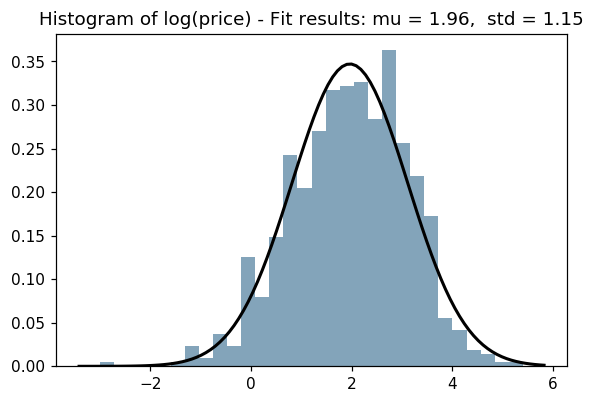

In [31]:
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=30, density=True, alpha=0.6, color='#30678D')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Histogram of log(price) - Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'log(price) in million of EUR')

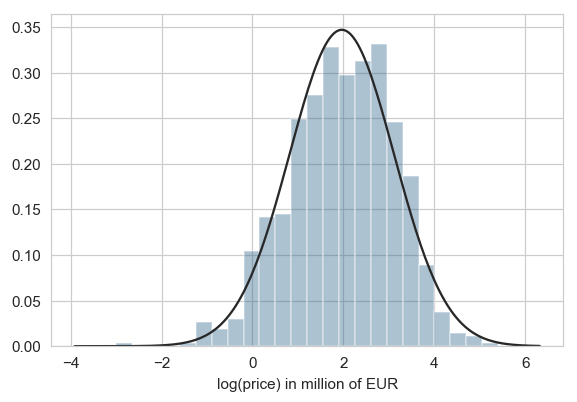

In [39]:
sb.distplot(data, color='#30678D',fit=norm, kde=False)
plt.xlabel('log(price) in million of EUR')

C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


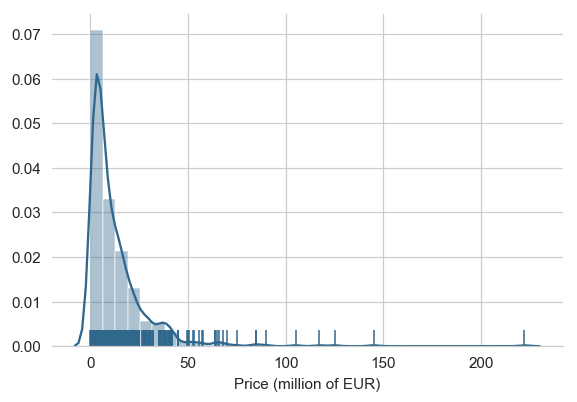

In [32]:
sb.set_style("whitegrid")
#sb.set(color_codes = False)
sb.distplot(d_team_player.price_tm, kde=True, bins=35, rug=True, color='#30678D')
plt.xlabel('Price (million of EUR)')
sb.despine(left=True)

In [69]:
len(d_team_player.price_tm)- len(d_team_player.price_tm[d_team_player.price_tm < 40]) # exclude 46 players that cost more than 40 Meuro

40

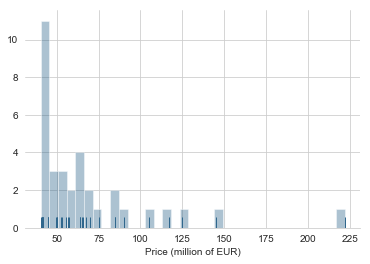

In [15]:
sb.set_style("whitegrid")
sb.distplot(d_team_player.price_tm[d_team_player.price_tm > 40], kde=False, rug=True, bins=35, color='#30678D')
plt.xlabel('Price (million of EUR)')
sb.despine(left=True)

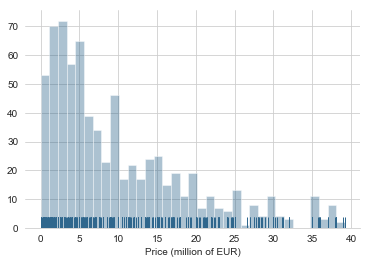

In [7]:
sb.set_style("whitegrid")
sb.distplot(d_team_player.price_tm[d_team_player.price_tm < 40], kde=False, rug=True, bins=35, color='#30678D')
plt.xlabel('Price (million of EUR)')
sb.despine(left=True)

How much do the different countries spend for the players?

In [71]:
# Analyis of teams buying

C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'openB')

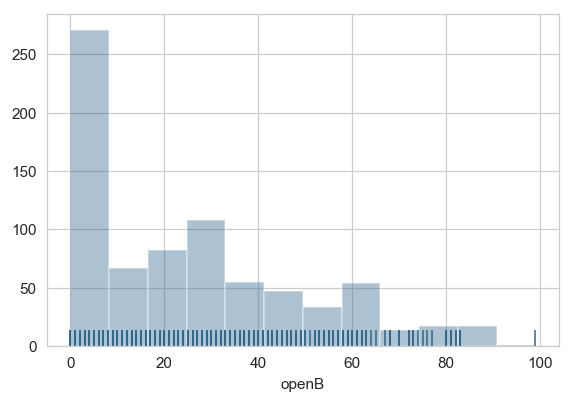

In [37]:
sb.set_style('whitegrid')
#sb.kdeplot(d_team_player['openB'], shade=True, color='#30678D')
sb.distplot(d_team_player.openB, kde=False, rug=True, color='#30678D')
plt.xlabel('openB')

In [38]:
df = pd.read_csv('data_17.csv', encoding = "utf8")

In [39]:
sns.distplot(x, kde=False, rug=True);

NameError: name 'sns' is not defined

In [40]:
df[df.days_from_openBuying>100] # Ignasi miquel prima dell'apertura della finestra -> lo correggo in data_diff -> apre 1 gennaio

,Unnamed: 0,date,season,height,weight,team_from,team_to,price,year,wintersummer,...,dummyfirst20,dummySheikh,Age,days_from_openBuying,europeanPerf_country_from,europeanPerf_country_to,number_export_players,number_import_players,abs_number_per_nation_sold,abs_number_per_nation_bought
287,287,07/12/2017,17/18,189,80,Lugo,Malaga,0.5,2017,s,...,0,0,25,159,20.142,20.142,2,5,140,153


C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'openB')

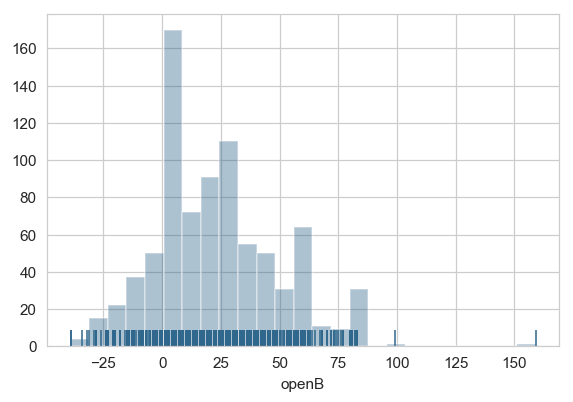

In [41]:
sb.set_style('whitegrid')
#sb.kdeplot(df['days_from_openBuying'], shade=True, color='#30678D')
sb.distplot(df.days_from_openBuying, kde=False, rug=True, color='#30678D')
plt.xlabel('openB')

In [73]:
dfExpense = pd.DataFrame(d_team_player.groupby('TT').sum().price_tm)
dfExpense.rename(columns={'price_tm':'totExpense'}, inplace=True)
dfExpense['TT'] = dfExpense.index
d_team_player = d_team_player.join(dfExpense.set_index('TT'), on='TT')

 NB teams who spended more tham 400 million in 3 years

In [74]:
# teams that in these years spent more than 400 million of euros for football players bought from other of the "big 8"
d_team_player[d_team_player.totExpense > 400].TT.unique()

array(['Chelsea', 'Manchester City', 'Barcelona', 'Juventus', 'PSG'],
      dtype=object)

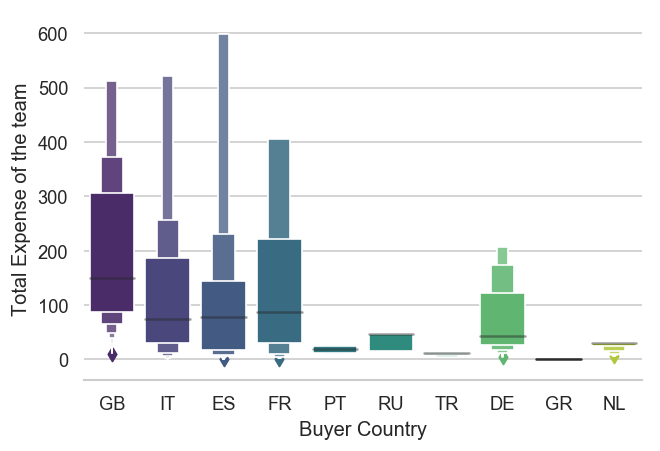

In [75]:
#palette2 ={"GB":"#440154","ES":"#472777","IT":"#3E4989","DE":"#30678D", "FR":"#25828E", "PT":"#1E9C89","NL":"#B2DD2C", "RU":"#35B778","TR":"#6BCD59","GR":"#FDE724"}
sb.set_style("whitegrid")
fig = sb.boxenplot(x = 'countryB', y = 'totExpense', palette='viridis',  data = d_team_player)
fig.set(xlabel='Buyer Country', ylabel='Total Expense of the team')
sb.despine(left=True)

In [76]:
d_team_player[d_team_player.price_tm > 80]

,Unnamed: 0,X,season_x,height,weight,TF,TT,price,ws,role,...,div,dA,dB,dC,price_tm,MV,diff,diff_tm,name_final,totExpense
19,20,19,16/17,191,84,Juventus,Manchester United,105.0,s,Midfielder,...,a,1,0,0,105.00,70.0,35.0,35.00,P. Pogba,371.40
120,121,120,16/17,184,82,Napoli,Juventus,90.0,s,Attacker,...,a,1,0,0,90.00,65.0,25.0,25.00,G. Higuain,522.10
293,294,299,17/18,190,94,Everton,Manchester United,84.7,s,Attacker,...,a,1,0,0,84.70,50.0,34.7,34.70,R. Lukaku,371.40
320,321,328,17/18,178,67,Borussia Dortmund,Barcelona,105.0,s,Attacker,...,a,1,0,0,125.00,33.0,72.0,92.00,O. Dembele,599.35
514,515,524,17/18,175,68,Barcelona,PSG,222.0,s,Attacker,...,a,1,0,0,222.00,100.0,122.0,122.00,Neymar,404.50
536,537,546,17/18,193,92,Southampton,Liverpool,78.8,w,Defender,...,a,1,0,0,84.65,30.0,48.8,54.65,V. van Dijk,307.05
543,544,553,17/18,171,68,Liverpool,Barcelona,160.0,w,Midfielder,...,a,1,0,0,145.00,90.0,70.0,55.00,Philippe Coutinho,599.35
665,666,675,18/19,187,83,Real Madrid,Juventus,120.0,s,Attacker,...,a,1,0,0,117.00,100.0,20.0,17.00,Cristiano Ronaldo,522.10


In [77]:
d_team_player.shape

(767, 146)

In [78]:
Counter(d_team_player['countryB'])

Counter({'GB': 207,
         'IT': 197,
         'ES': 139,
         'FR': 61,
         'PT': 10,
         'RU': 5,
         'TR': 12,
         'DE': 131,
         'GR': 1,
         'NL': 4})

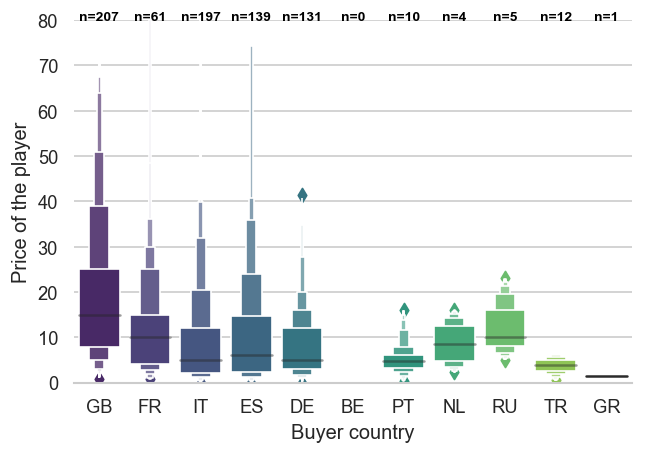

In [79]:
# quanto spendono le varie nazioni per i giocatori
sb.set(style='whitegrid')
ax= sb.boxenplot(x ='countryB', y='price_tm', order= ['GB','FR','IT','ES','DE','BE','PT','NL','RU','TR','GR'], palette='viridis', data=d_team_player)
ax.set(xlabel='Buyer country', ylabel='Price of the player')
ax.set_ylim([0, 80])
sb.despine(left=True)

# Calculate number of obs per group & median to position labels
medians = (80,80,80,80,80,80,80,80,80,80,80)
nobs = (str(207),str(61),str(197),str(139),str(131),str(0),str(10),str(4),str(5),str(12),str(1))
nobs = ["n=" + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))

for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='x-small', color='black', weight='semibold')
 

In [80]:
d_team_player.groupby('countryS').count().iloc[:,0]

countryS
BE     20
DE    116
ES    130
FR     96
GB    158
IT    176
NL     37
PT     34
Name: Unnamed: 0, dtype: int64

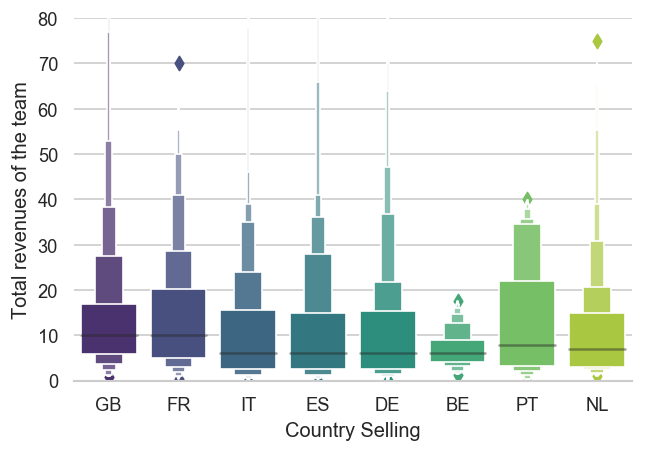

In [82]:
fig= sb.boxenplot(x ='countryS', y='price_tm',palette='viridis', order= ['GB','FR','IT','ES','DE','BE','PT','NL'], data=d_team_player)
fig.set(xlabel='Country Selling', ylabel='Total revenues of the team')
fig.set_ylim([0, 80])
sb.despine(left=True)

C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Seller country'),
 Text(0.5,0,'Total number of players sold in 3 years')]

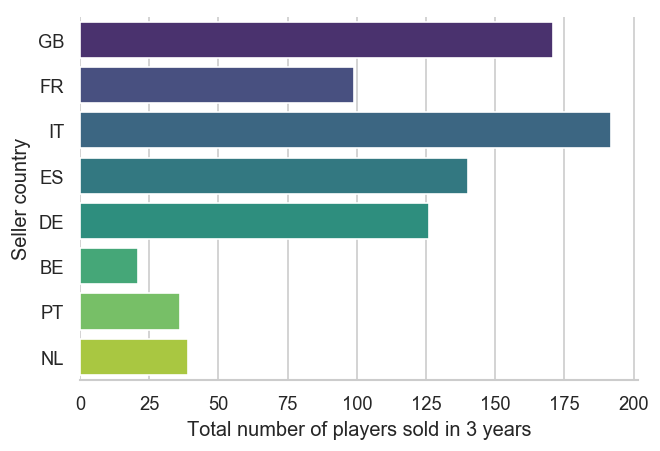

In [85]:
fig = sb.barplot(x = 'noCS', y='countryS',data=d_team_player,palette='viridis',order= ['GB','FR','IT','ES','DE','BE','PT','NL'])
sb.despine(left=True)
fig.set(xlabel='Total number of players sold in 3 years', ylabel='Seller country')

C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[[<matplotlib.axis.XTick at 0x130c4245fd0>,

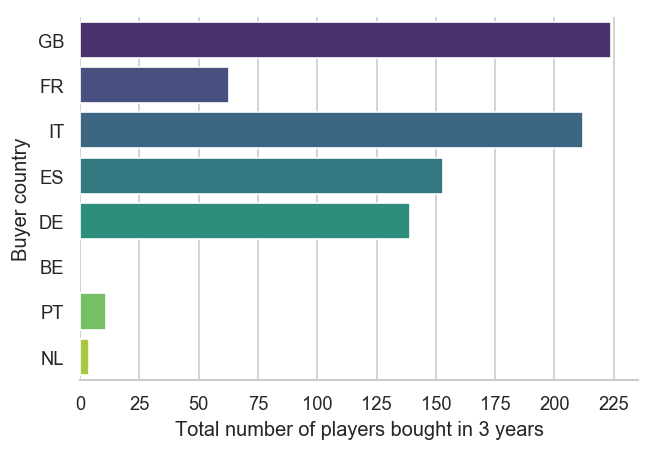

In [86]:
fig = sb.barplot(x = 'noCB', y='countryB', data=d_team_player,palette='viridis',order= ['GB','FR','IT','ES','DE','BE','PT','NL'])
sb.despine(left=True)
fig.set(xlabel='Total number of players bought in 3 years', ylabel='Buyer country')
fig.set(xticks=[0,25,50,75,100,125,150,175,200,225])

How many players were bought from each nation?

In [47]:
# viridis Viridis10   = ['#440154', '#472777', '#3E4989', '#30678D', '#25828E', '#1E9C89', '#35B778', '#6BCD59', '#B2DD2C', '#FDE724']
# Viridis8    = ['#440154', '#46317E', '#365A8C', '#277E8E', '#1EA087', '#49C16D', '#9DD93A', '#FDE724']

# graph dummy AB

Where is the selling team playing? How much is the difference in mean between players bought from the first and secondo division?

C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


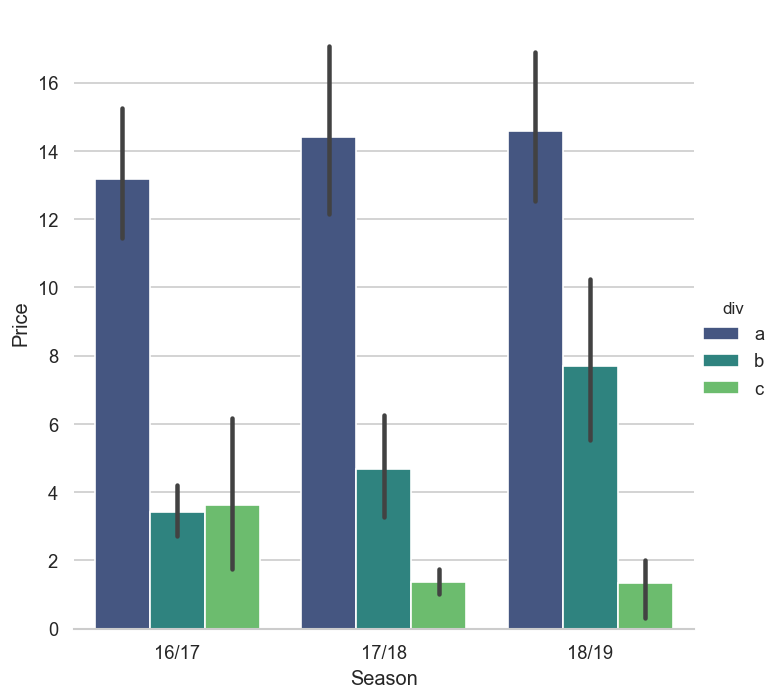

In [87]:
g = sb.catplot(x="season_x", y="price_tm", hue="div", data=d_team_player,
                height=6, kind="bar", palette="viridis")
g.set(xlabel='Season', ylabel='Price')
g.despine(left=True)

C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


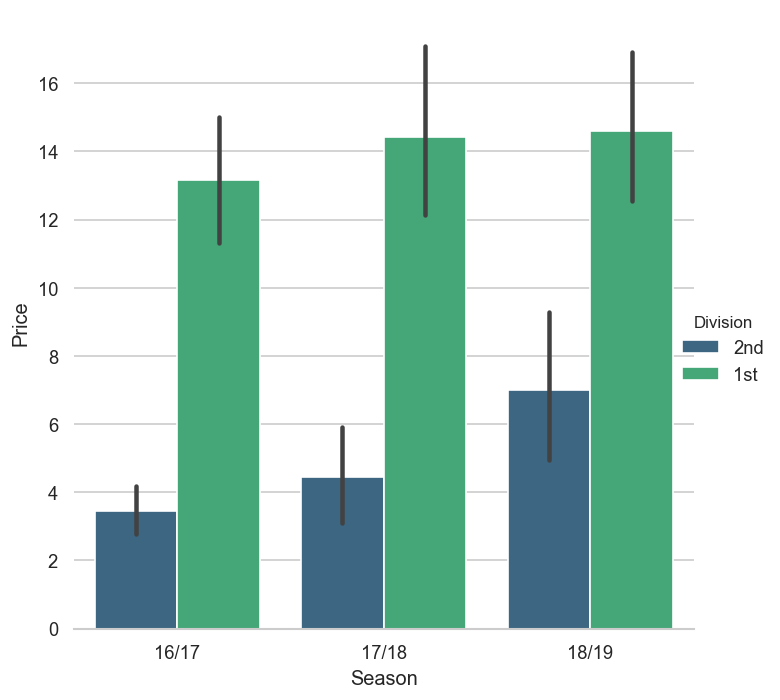

In [90]:
g = sb.catplot(x="season_x", y="price_tm", hue="dA", data=d_team_player,
                height=6, kind="bar", palette="viridis")
g.despine(left=True)
g.set(xlabel='Season', ylabel='Price')

for ax in g.axes.flat:
    leg = g.axes.flat[0].get_legend()
    if not leg is None: break
        
if leg is None: leg = g._legend

# change legend texts
new_title = 'Division'
leg.set_title(new_title)
new_labels = ['2nd', '1st']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

    #plt.legend(title='Division', loc='upper left', labels=['2nd', '1st'])

C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(47.6906,0.5,'price_tm'), Text(0.5,40.6,'Buyer country')]

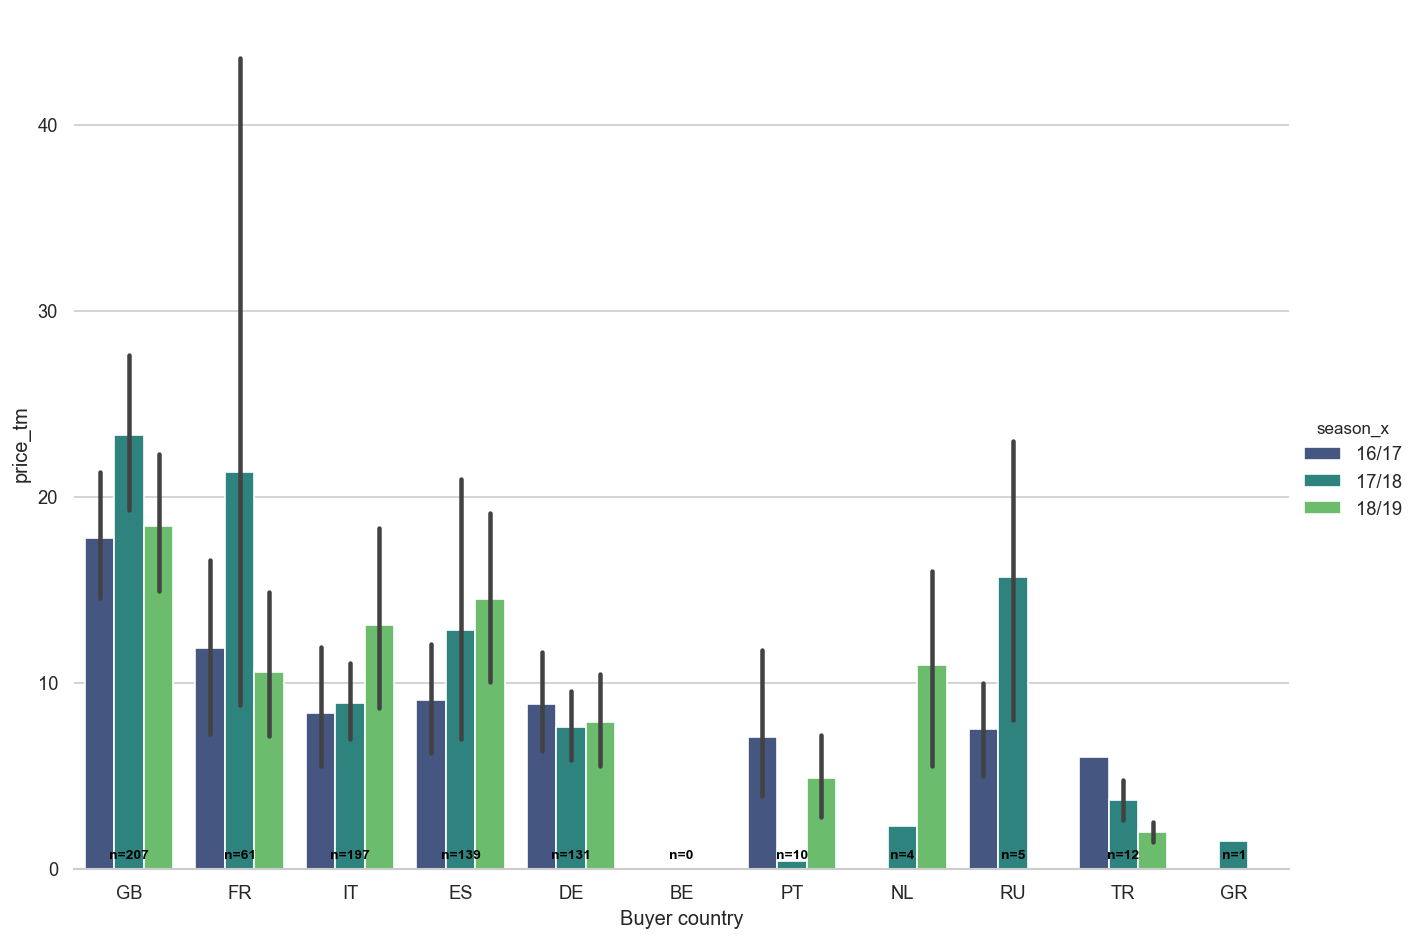

In [91]:
sb.set_style("whitegrid")
#sb.set(rc={'figure.figsize':(11.7,8.27)})
g = sb.catplot(x="countryB", y="price_tm", hue="season_x", data=d_team_player, kind="bar", palette="viridis",order= ['GB','FR','IT','ES','DE','BE','PT','NL','RU','TR','GR'],height=8, aspect=11/8)
g.despine(left=True)
g.set(xlabel='Buyer country', ylabel='Price')

for ax in g.axes.flat:
    leg = g.axes.flat[0].get_legend()
    if not leg is None: break
        
if leg is None: leg = g._legend

# change legend texts
new_title = 'season_x'
leg.set_title(new_title)

medians = (0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5)
nobs = (str(207),str(61),str(197),str(139),str(131),str(0),str(10),str(4),str(5),str(12),str(1))
nobs = ["n=" + i for i in nobs]

#nobs = d_team_player['country_buying'].value_counts().values
#nobs = [str(x) for x in nobs.tolist()]
#nobs = ["n: " + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='black', weight='semibold')
ax.set(xlabel='Buyer country', ylabel='price_tm')

In [93]:
data_pricemax100 = d_team_player[d_team_player.price_tm<100]
Counter(data_pricemax100['countryB'])

Counter({'GB': 206,
         'IT': 196,
         'ES': 137,
         'FR': 60,
         'PT': 10,
         'RU': 5,
         'TR': 12,
         'DE': 131,
         'GR': 1,
         'NL': 4})

C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(47.6906,0.5,'Price'), Text(0.5,40.6,'Buyer country')]

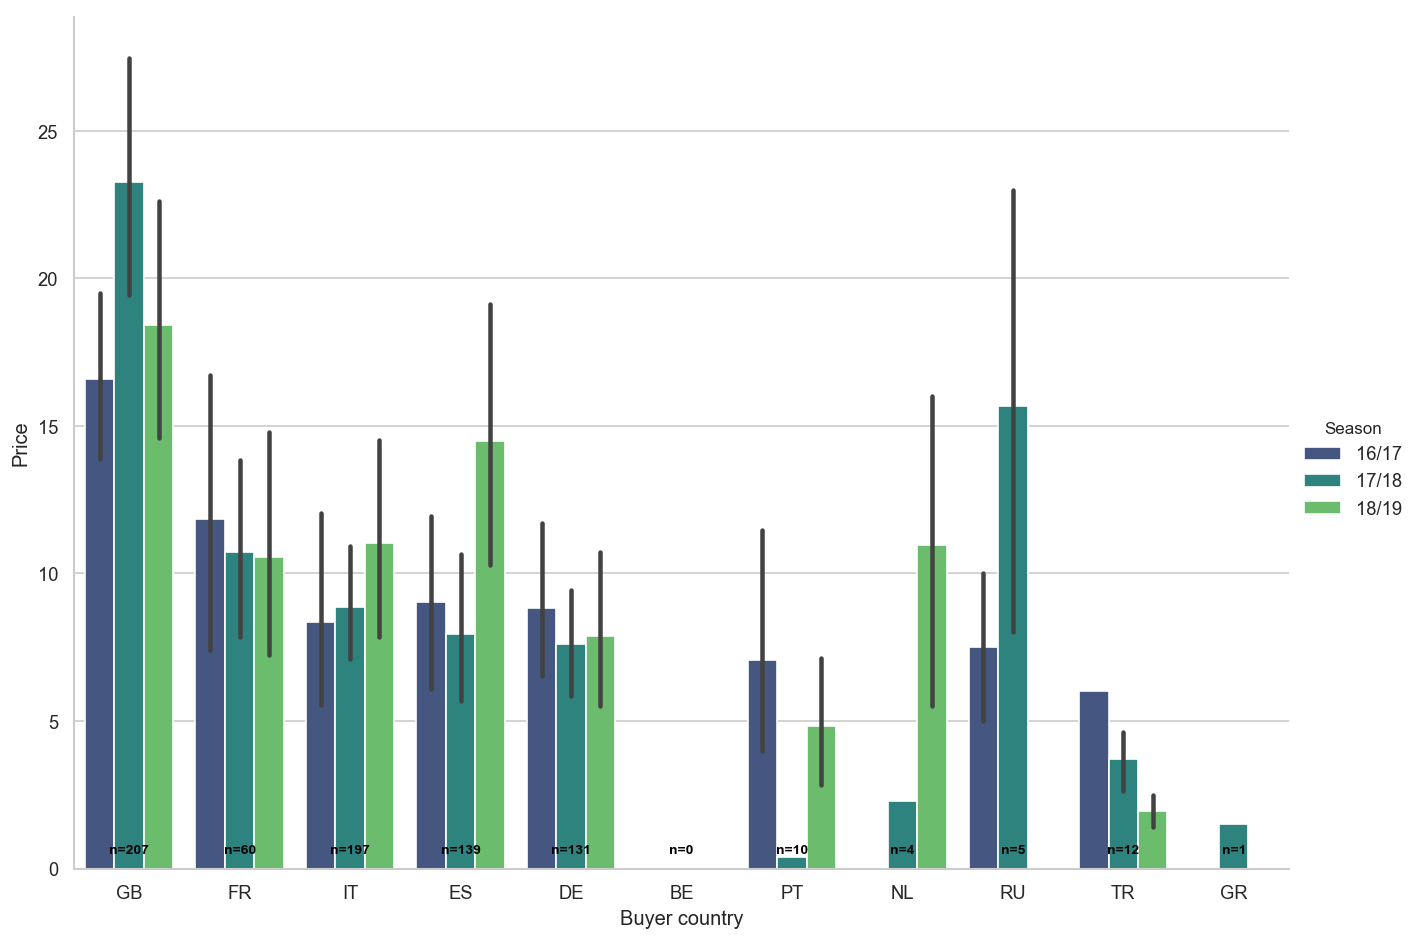

In [98]:
# tolgo neymar e analizzo chi compra

sb.set_style("whitegrid")
g = sb.catplot(x="countryB", y="price_tm", hue="season_x", data=data_pricemax100, kind="bar", palette="viridis",order= ['GB','FR','IT','ES','DE','BE','PT','NL','RU','TR','GR'],height=8, aspect=11/8)
#g.despine(left=True)

for ax in g.axes.flat:
    leg = g.axes.flat[0].get_legend()
    if not leg is None: break
        
if leg is None: leg = g._legend

# change legend texts
new_title = 'Season'
leg.set_title(new_title)

medians = (0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5)
nobs = (str(207),str(60),str(197),str(139),str(131),str(0),str(10),str(4),str(5),str(12),str(1))
nobs = ["n=" + i for i in nobs]

#nobs = data_pricemax100['country_buying'].value_counts().values
#nobs = [str(x) for x in nobs.tolist()]
#nobs = ["n=" + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='black', weight='semibold')
ax.set(xlabel='Buyer country', ylabel='Price')

In [102]:
Counter(data_pricemax100['countryS'])

Counter({'IT': 175,
         'FR': 96,
         'GB': 157,
         'PT': 34,
         'ES': 128,
         'BE': 20,
         'DE': 115,
         'NL': 37})

C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(47.6906,0.5,'Price'), Text(0.5,40.6,'Seller country')]

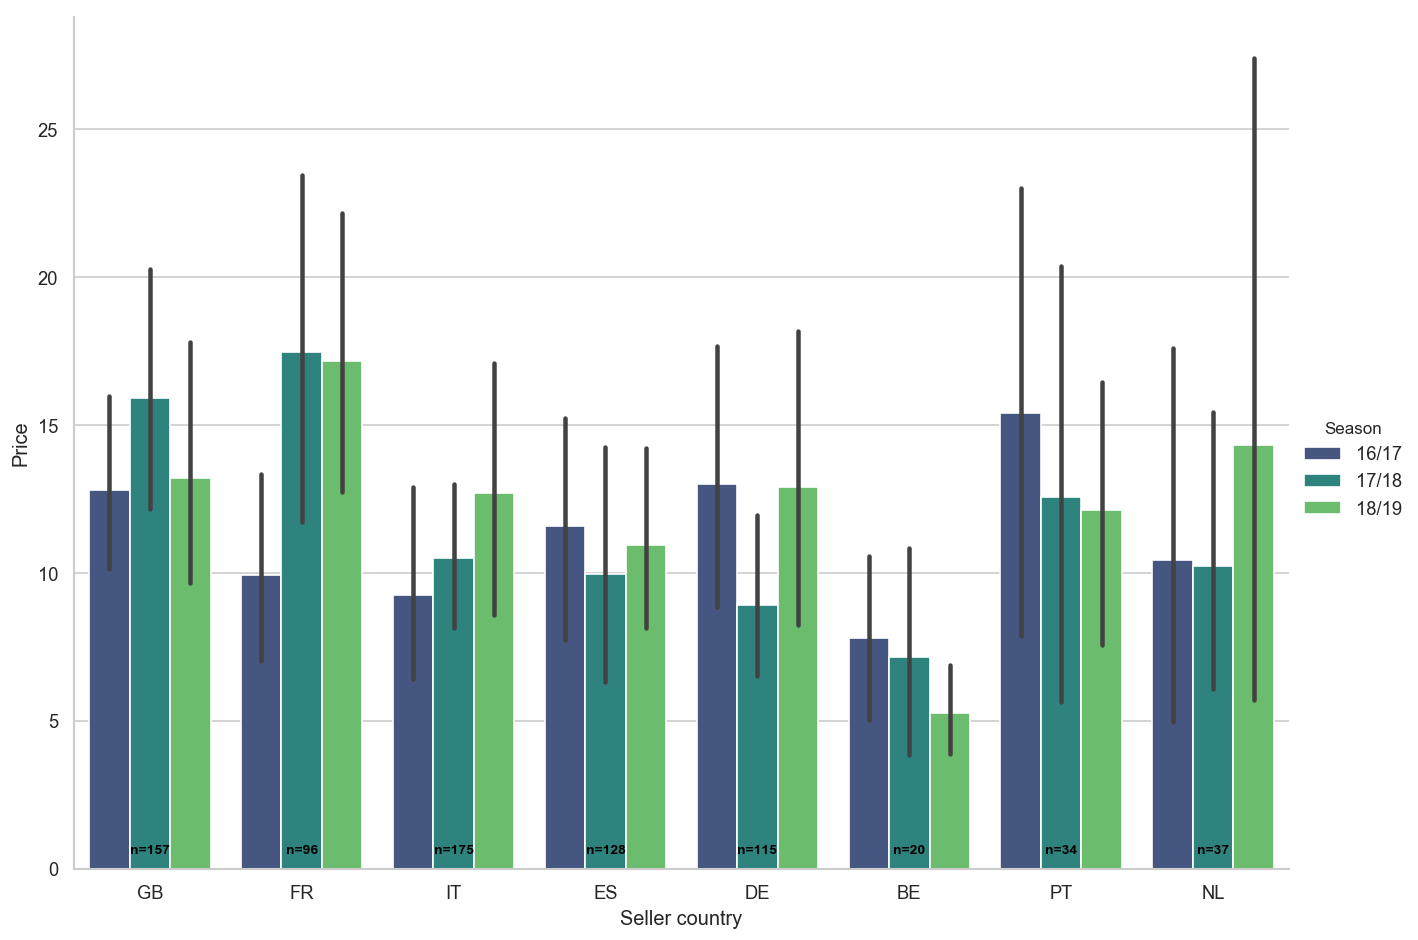

In [103]:
# chi vende?
sb.set_style("whitegrid")
g = sb.catplot(x="countryS", y="price_tm", hue="season_x", data=data_pricemax100, kind="bar", palette="viridis", order= ['GB','FR','IT','ES','DE','BE','PT','NL'],height=8, aspect=11/8)
#g.despine(left=True)

for ax in g.axes.flat:
    leg = g.axes.flat[0].get_legend()
    if not leg is None: break
        
if leg is None: leg = g._legend

# change legend texts
new_title = 'Season'
leg.set_title(new_title)

medians = (0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5)
nobs = (str(157),str(96),str(175),str(128),str(115),str(20),str(34),str(37))
nobs = ["n=" + i for i in nobs]

#nobs = data_pricemax100['country_selling'].value_counts().values
#nobs = [str(x) for x in nobs.tolist()]
#nobs = ["n=" + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='black', weight='semibold')
ax.set(xlabel='Seller country', ylabel='Price')

In [55]:
#pd.set_option('display.max_columns', 20)

In [105]:
# togli de jong
data_noDeJong = data_pricemax100[(data_pricemax100.name_final != 'F. de Jong') | (data_pricemax100.TT != 'Barcelona')]
#data_noDeJong.groupby('country_selling').count().iloc[:,0]

C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(47.6906,0.5,'Price'), Text(0.5,40.6,'Seller country')]

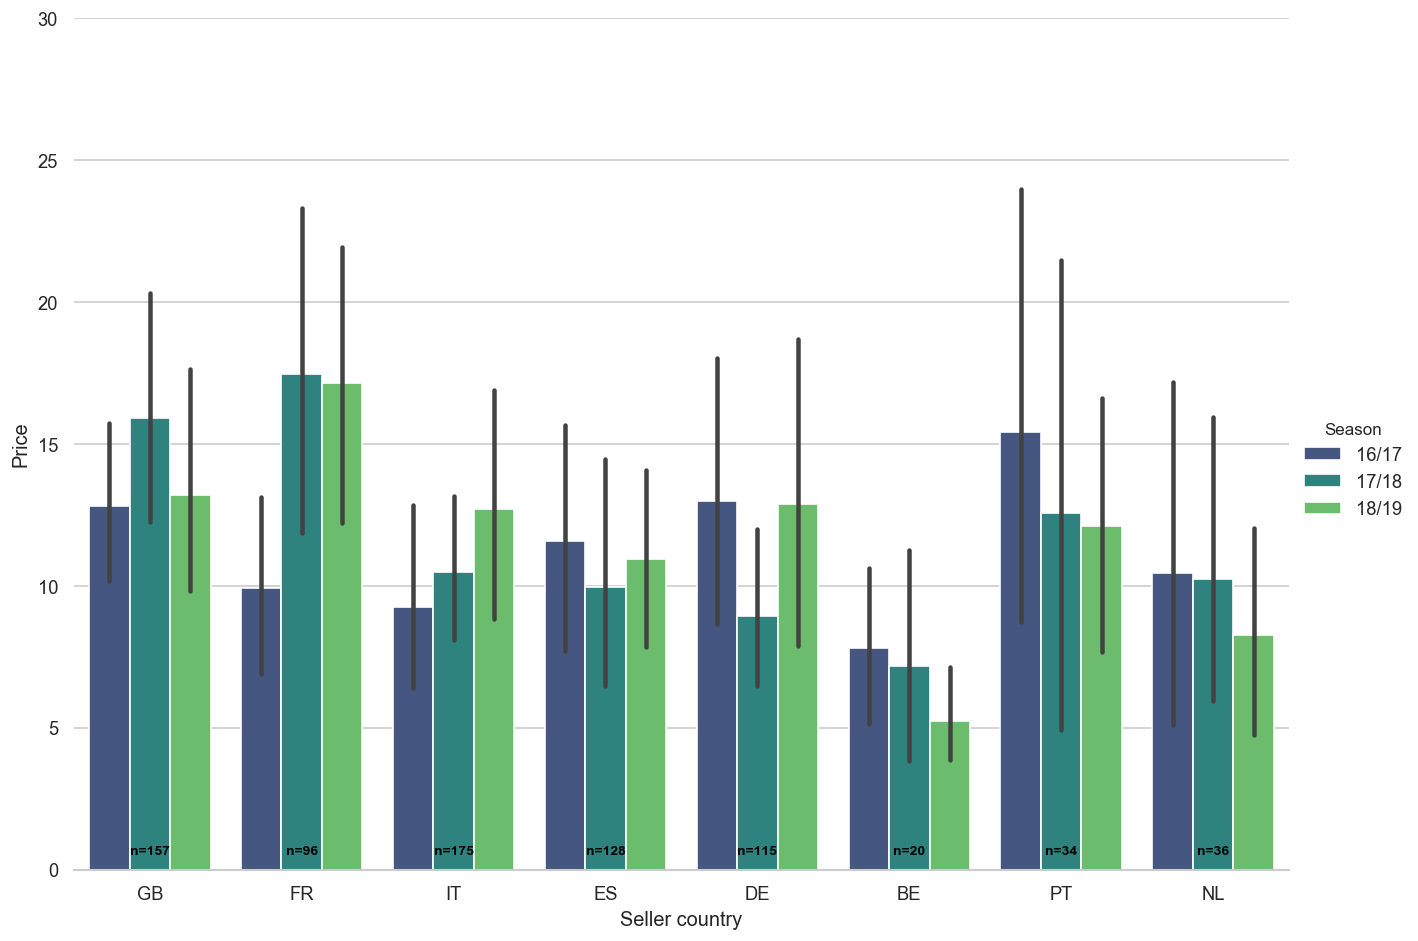

In [106]:
sb.set_style("whitegrid")
g = sb.catplot(x="countryS", y="price_tm", hue="season_x", data=data_noDeJong, kind="bar", palette="viridis",height=8, aspect=11/8, order= ['GB','FR','IT','ES','DE','BE','PT','NL'])
g.despine(left=True)
g.set(ylim=(0, 30))

for ax in g.axes.flat:
    leg = g.axes.flat[0].get_legend()
    if not leg is None: break
        
if leg is None: leg = g._legend

# change legend texts
new_title = 'Season'
leg.set_title(new_title)

medians = (0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5)
nobs = (str(157),str(96),str(175),str(128),str(115),str(20),str(34),str(36))
nobs = ["n=" + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='black', weight='semibold')
ax.set(xlabel='Seller country', ylabel='Price')

In [107]:
#correlazioni
df = pd.read_csv('data_diff.csv', encoding='utf8')

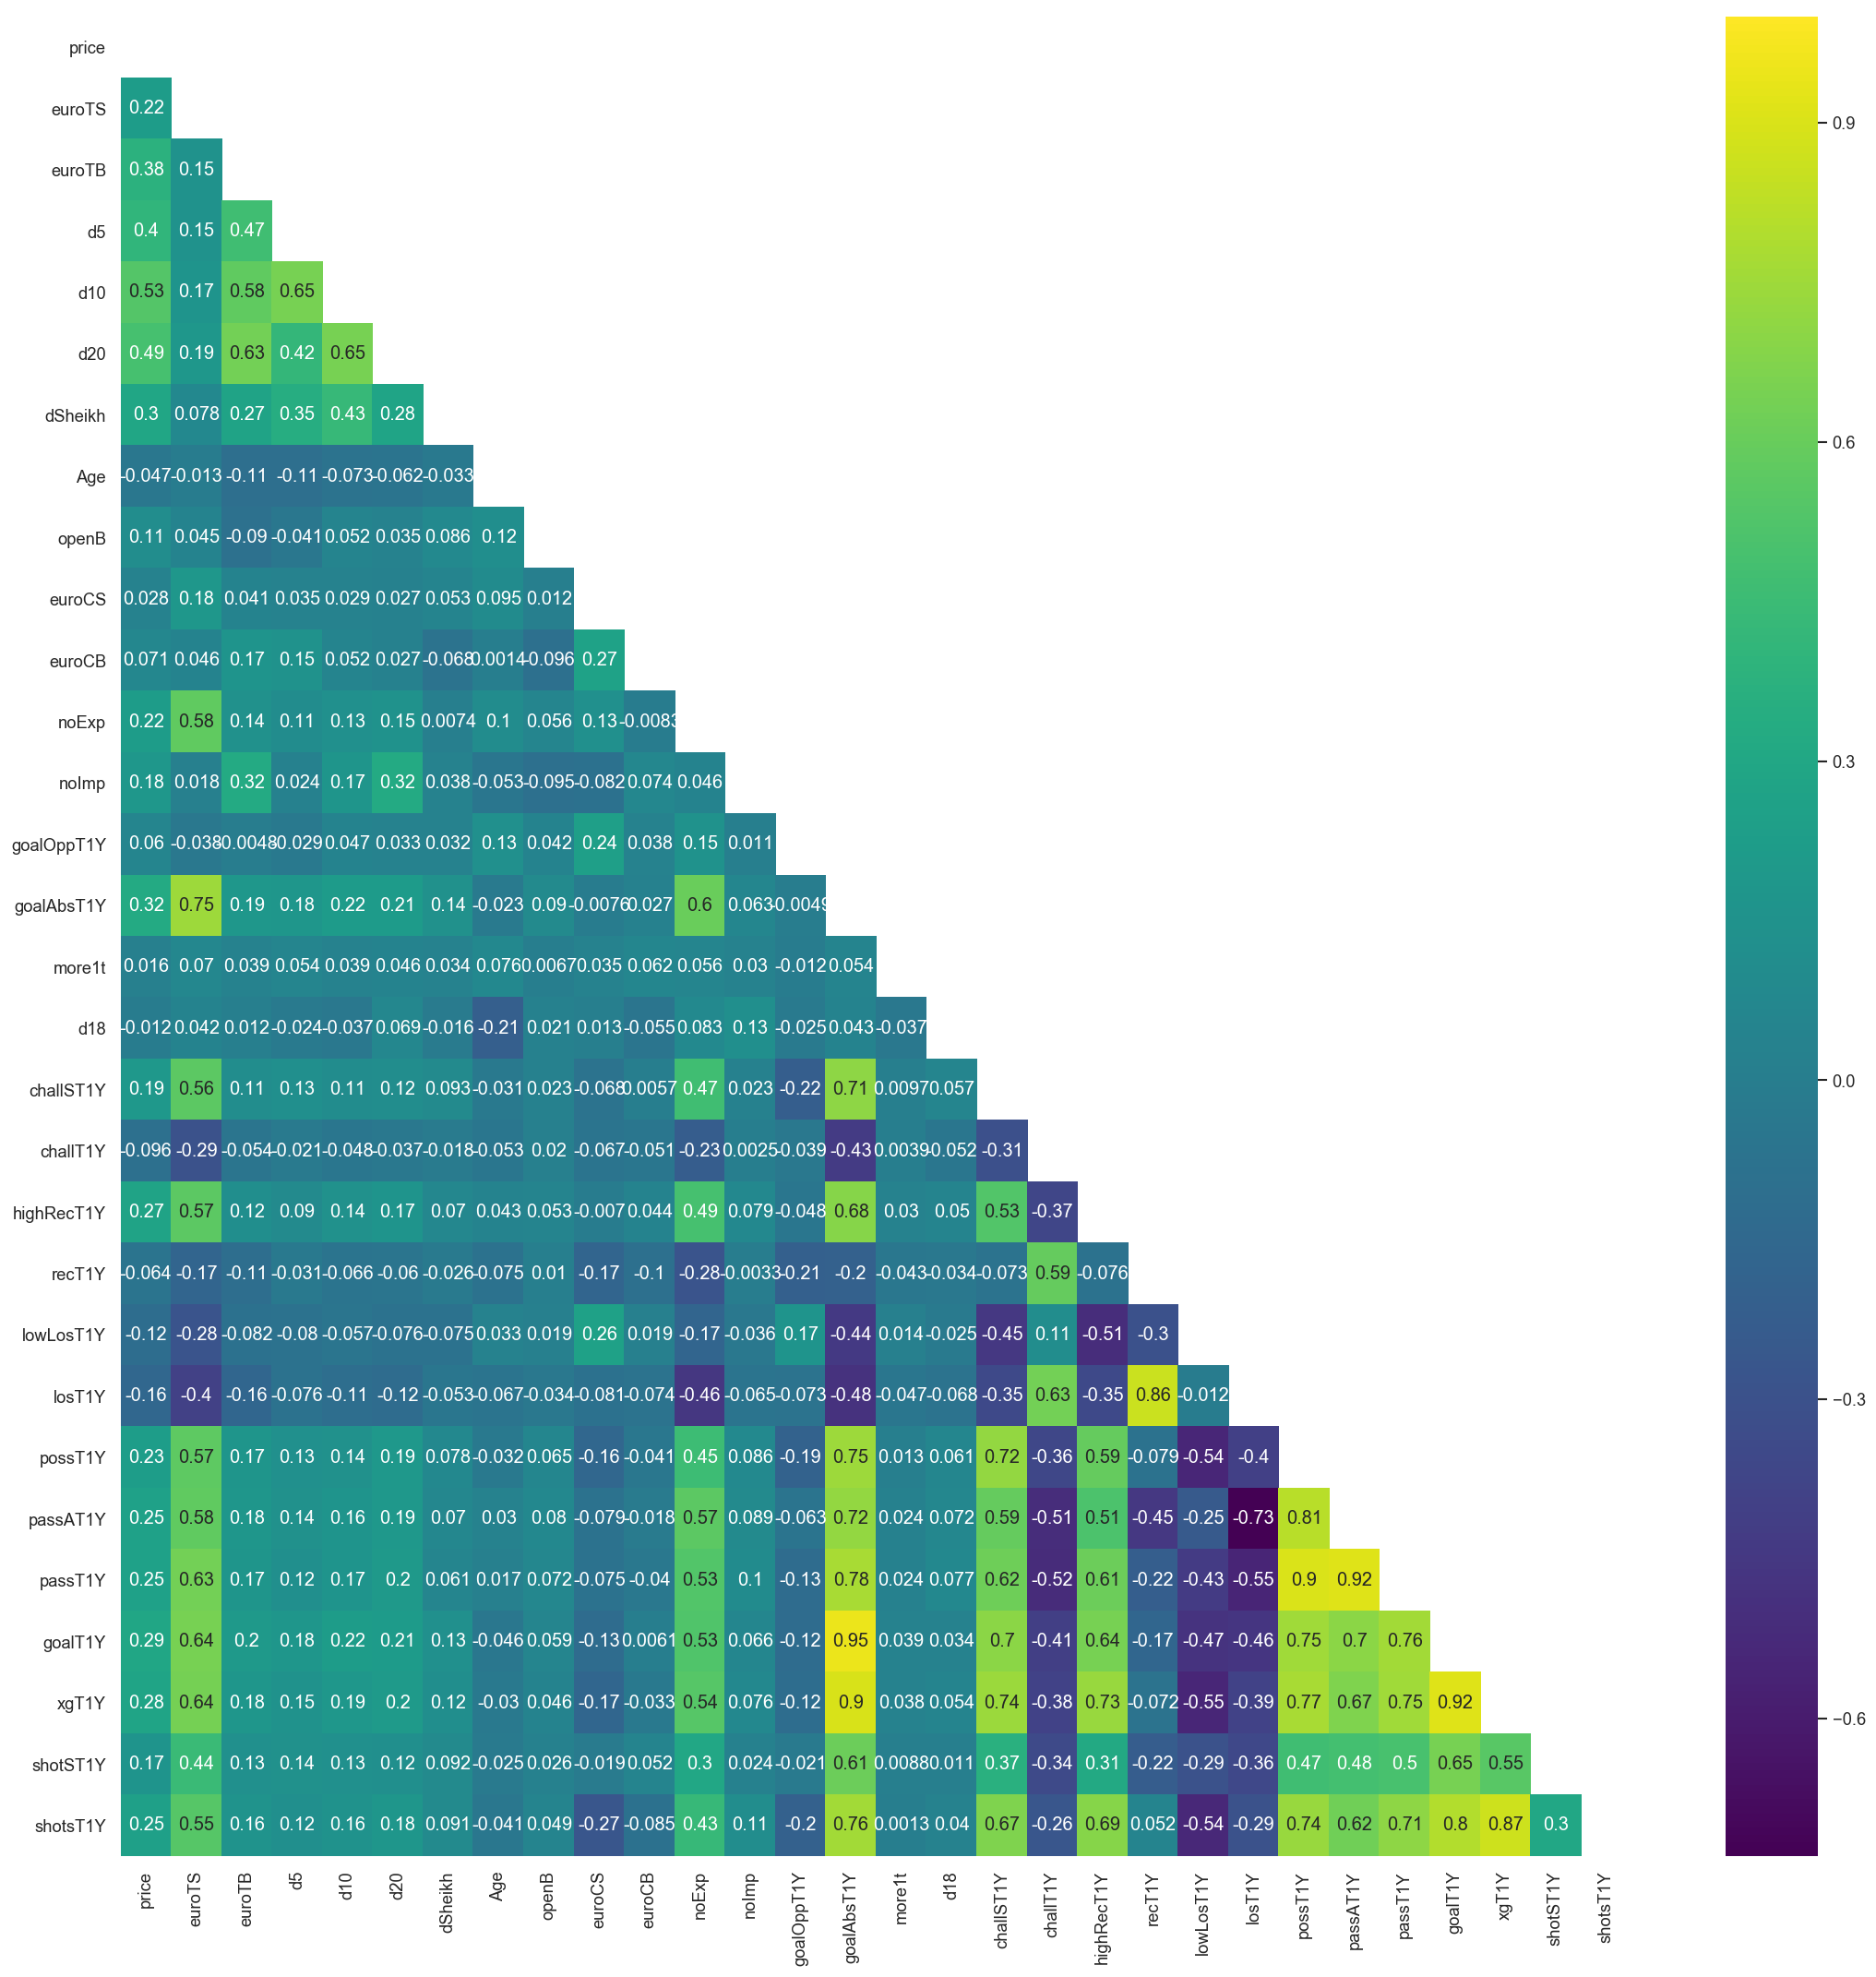

In [108]:
#dfcorr = df.drop(columns=['Unnamed: 0','shortName','date'], axis=1)
dfcorr = pd.read_csv('data_models.csv', encoding='utf8').drop(columns=['Unnamed: 0'], axis=1)
dfcorr = dfcorr.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,129,130,131,132,128,127,126,125,124,123,122,121,120,119,118,117,116]]
fig, ax = plt.subplots(figsize=(22, 22)) 
mask = np.zeros_like(dfcorr.corr())
mask[np.triu_indices_from(mask)] = 1
sb.heatmap(dfcorr.corr(), mask= mask, ax=ax, annot= True, cmap='viridis')

In [112]:
df.shape

(767, 145)

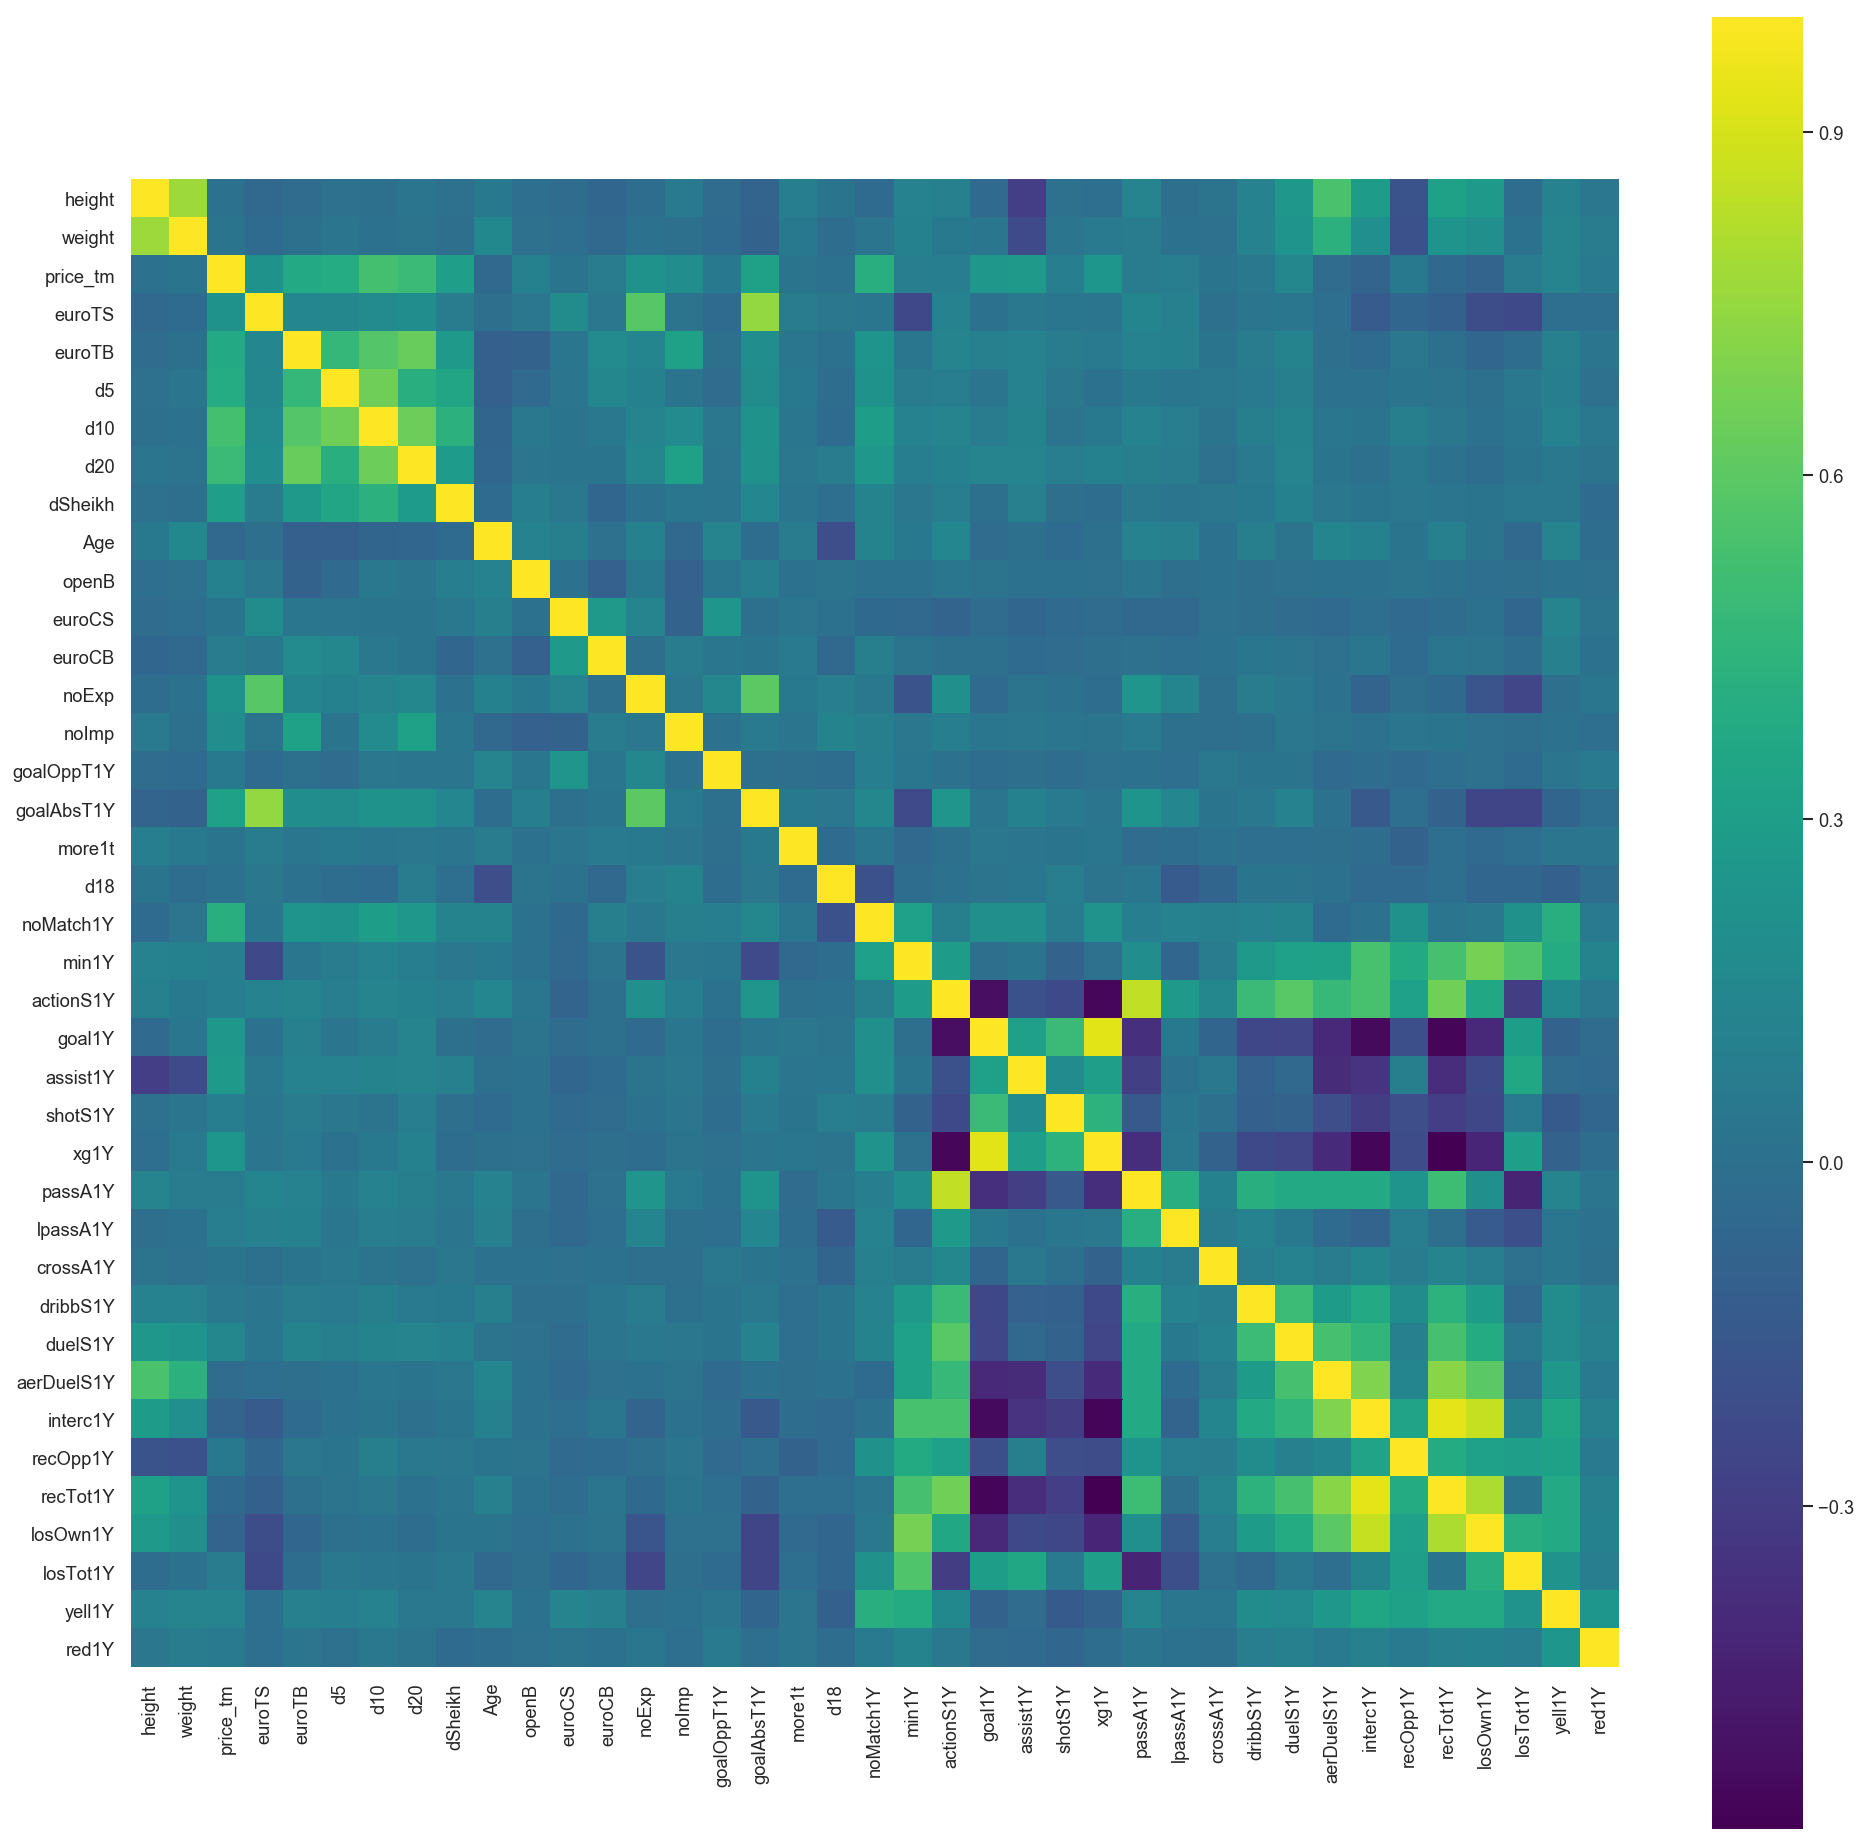

In [122]:
dfcorr = pd.read_csv('data_models.csv', encoding='utf8').drop(columns=['Unnamed: 0'], axis=1)
dfcorr = dfcorr.iloc[:, [1,2,138,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,129,130,131,132,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65]]

f, ax = plt.subplots(figsize=(20, 20))
corr = dfcorr.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='viridis', square=True, ax=ax)

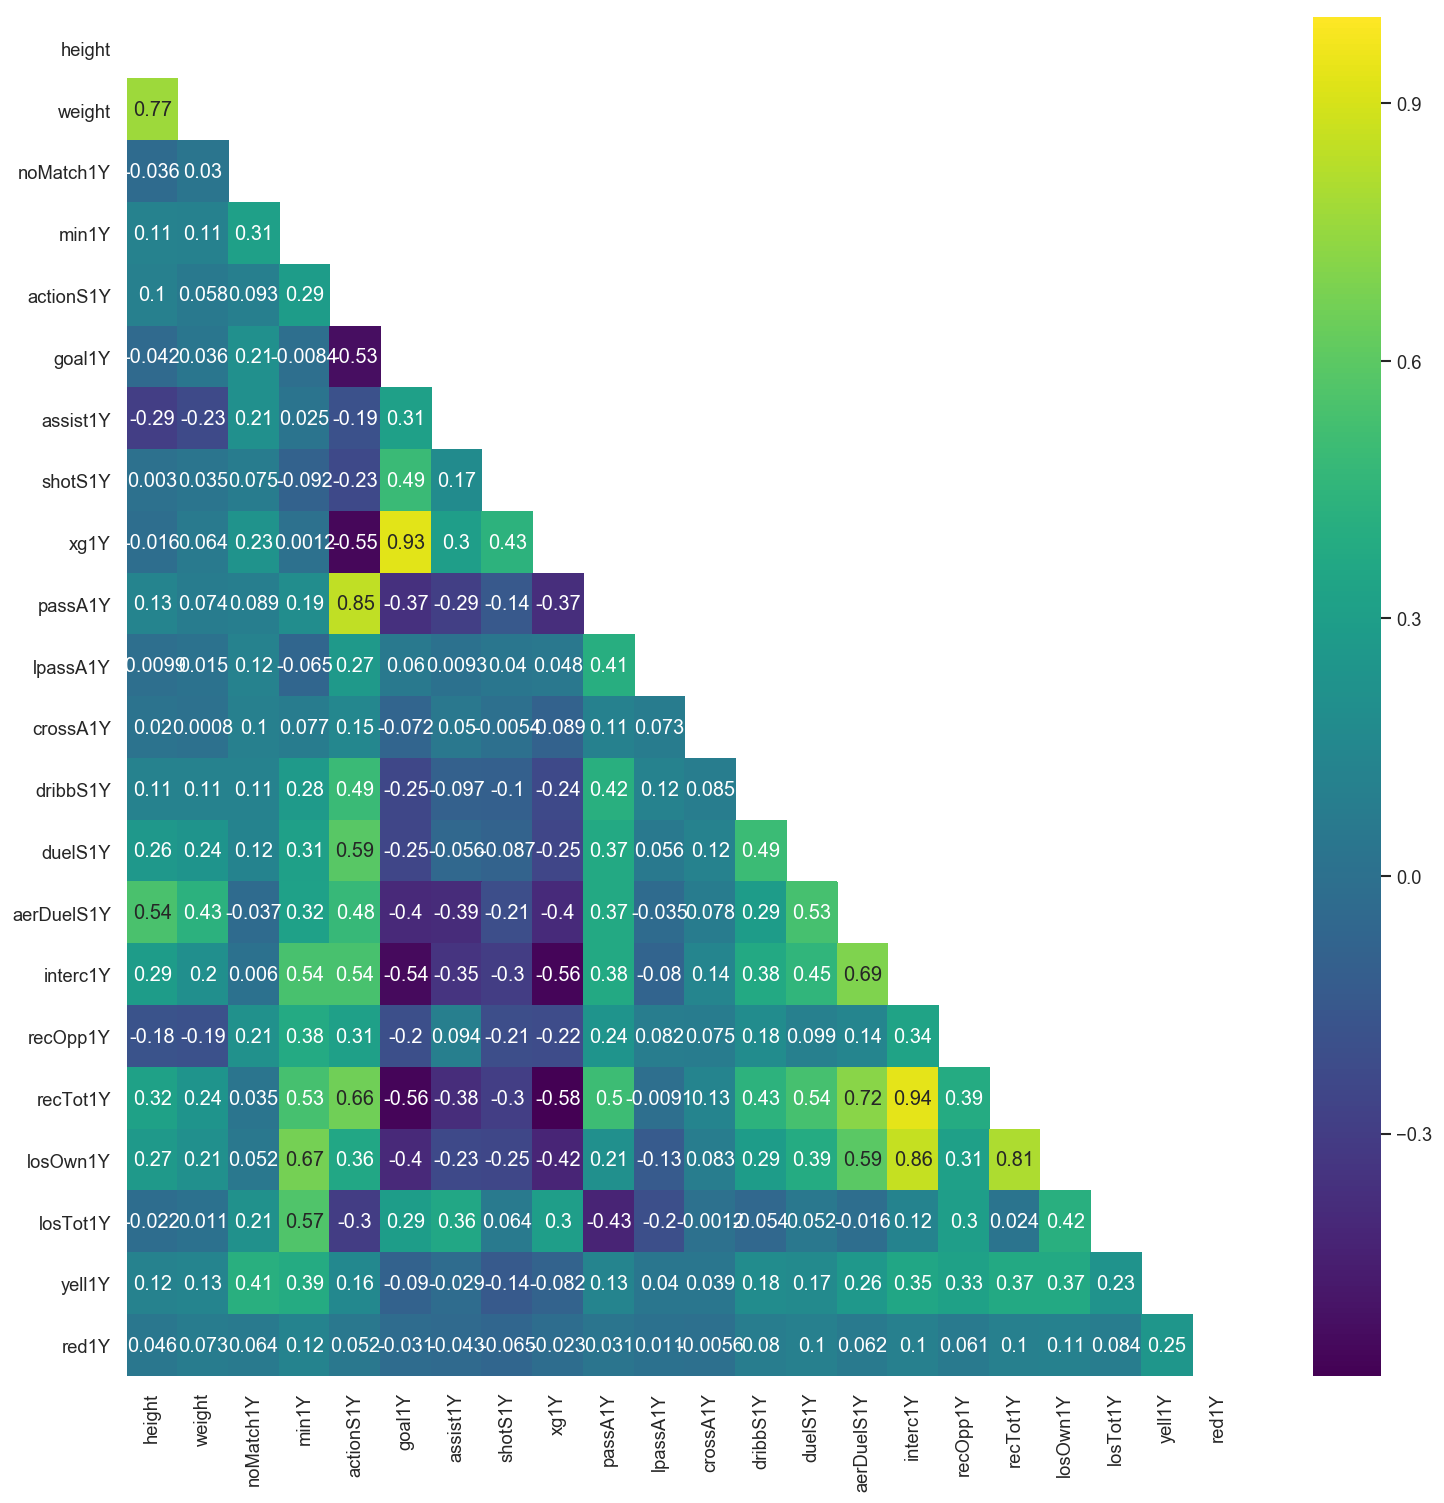

In [123]:
dfcorr = pd.read_csv('data_models.csv', encoding='utf8').drop(columns=['Unnamed: 0'], axis=1)
dfcorr = dfcorr.iloc[:, [1,2,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65]]
fig, ax = plt.subplots(figsize=(15, 15)) 
mask = np.zeros_like(dfcorr.corr())
mask[np.triu_indices_from(mask)] = 1
sb.heatmap(dfcorr.corr(), mask= mask, ax=ax, annot= True, cmap='viridis')

C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Age')

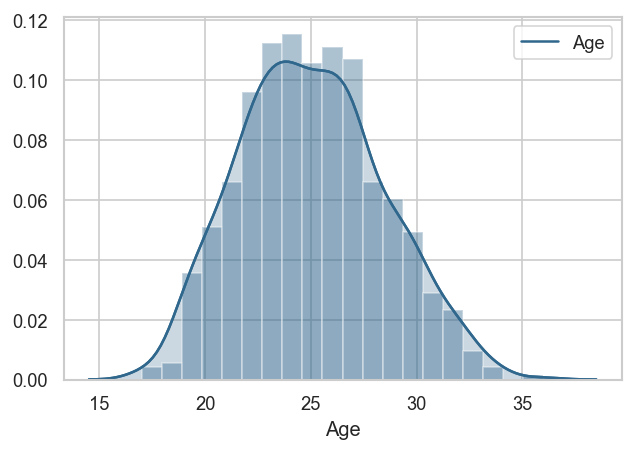

In [124]:
sb.set_style('whitegrid')
sb.kdeplot(df['Age'], shade=True, color='#30678D')
sb.distplot(df.Age, kde=True, color='#30678D', bins=20)
plt.xlabel('Age')

In [127]:
data_pricemax80 = df[df.price_tm<80]
data_pricemax80.shape[0]

759

C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


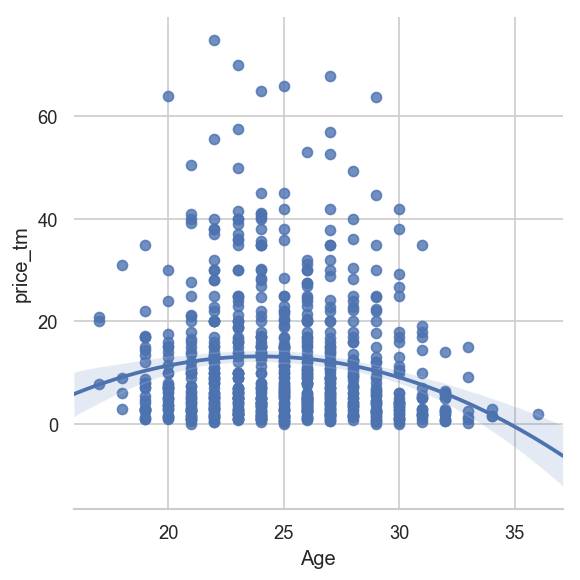

In [128]:
sb.set_style('whitegrid')
g = sb.lmplot(x="Age", y="price_tm", data=data_pricemax80, order=2, palette='viridis')
g.despine(left=True)

In [129]:
sum(df['openB']<0)

0

C:\Users\letym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'openB')

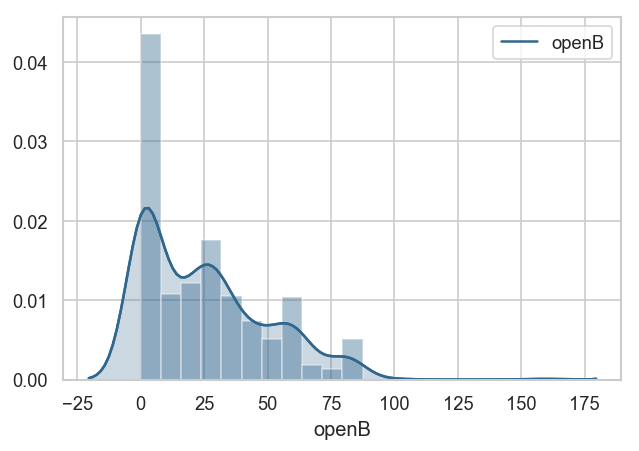

In [130]:
sb.set_style('whitegrid')
sb.kdeplot(df['openB'], shade=True, color='#30678D')
sb.distplot(df.openB, kde=True, color='#30678D')
plt.xlabel('openB')

In [67]:
#sb.set_style('whitegrid')
#ax = sb.scatterplot(x="Age", y="price", hue="dummyfirst20", data=df, palette='viridis')

In [68]:
import scipy

def loc_eval(x, b):
    """
    Evaluate `x` using locally-weighted regression parameters.
    Degree of polynomial used in loess is inferred from b. `x`
    is assumed to be a scalar.
    """
    loc_est = 0
    for i in enumerate(b): loc_est+=i[1]*(x**i[0])
    return(loc_est)

def loess(xvals, yvals, alpha, poly_degree=1):
    """
    Perform locally-weighted regression on xvals & yvals.
    Variables used inside `loess` function:

        n         => number of data points in xvals
        m         => nbr of LOESS evaluation points
        q         => number of data points used for each
                     locally-weighted regression
        v         => x-value locations for evaluating LOESS
        locsDF    => contains local regression details for each
                     location v
        evalDF    => contains actual LOESS output for each v
        X         => n-by-(poly_degree+1) design matrix
        W         => n-by-n diagonal weight matrix for each
                     local regression
        y         => yvals
        b         => local regression coefficient estimates.
                     b = `(X^T*W*X)^-1*X^T*W*y`. Note that `@`
                     replaces `np.dot` in recent numpy versions.
        local_est => response for local regression
    """
    # Sort dataset by xvals.
    all_data = sorted(zip(xvals, yvals), key=lambda x: x[0])
    xvals, yvals = zip(*all_data)

    locsDF = pd.DataFrame(
                columns=[
                  'loc','x','weights','v','y','raw_dists',
                  'scale_factor','scaled_dists'
                  ])
    evalDF = pd.DataFrame(
                columns=[
                  'loc','est','b','v','g'
                  ])

    n = len(xvals)
    m = n + 1
    q = int(np.floor(n * alpha) if alpha <= 1.0 else n)
    avg_interval = ((max(xvals)-min(xvals))/len(xvals))
    v_lb = max(0,min(xvals)-(.5*avg_interval))
    v_ub = (max(xvals)+(.5*avg_interval))
    v = enumerate(np.linspace(start=v_lb, stop=v_ub, num=m), start=1)

    # Generate design matrix based on poly_degree.
    xcols = [np.ones_like(xvals)]
    for j in range(1, (poly_degree + 1)):
        xcols.append([i ** j for i in xvals])
    X = np.vstack(xcols).T


    for i in v:

        iterpos = i[0]
        iterval = i[1]

        # Determine q-nearest xvals to iterval.
        iterdists = sorted([(j, np.abs(j-iterval)) \
                           for j in xvals], key=lambda x: x[1])

        _, raw_dists = zip(*iterdists)

        # Scale local observations by qth-nearest raw_dist.
        scale_fact = raw_dists[q-1]
        scaled_dists = [(j[0],(j[1]/scale_fact)) for j in iterdists]
        weights = [(j[0],((1-np.abs(j[1]**3))**3 \
                      if j[1]<=1 else 0)) for j in scaled_dists]

        # Remove xvals from each tuple:
        _, weights      = zip(*sorted(weights,     key=lambda x: x[0]))
        _, raw_dists    = zip(*sorted(iterdists,   key=lambda x: x[0]))
        _, scaled_dists = zip(*sorted(scaled_dists,key=lambda x: x[0]))

        iterDF1 = pd.DataFrame({
                    'loc'         :iterpos,
                    'x'           :xvals,
                    'v'           :iterval,
                    'weights'     :weights,
                    'y'           :yvals,
                    'raw_dists'   :raw_dists,
                    'scale_fact'  :scale_fact,
                    'scaled_dists':scaled_dists
                    })

        locsDF    = pd.concat([locsDF, iterDF1])
        W         = np.diag(weights)
        y         = yvals
        b         = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
        local_est = loc_eval(iterval, b)
        iterDF2   = pd.DataFrame({
                       'loc':[iterpos],
                       'b'  :[b],
                       'v'  :[iterval],
                       'g'  :[local_est]
                       })

        evalDF = pd.concat([evalDF, iterDF2])

    # Reset indicies for returned DataFrames.
    locsDF.reset_index(inplace=True)
    locsDF.drop('index', axis=1, inplace=True)
    locsDF['est'] = 0; evalDF['est'] = 0
    locsDF = locsDF[['loc','est','v','x','y','raw_dists',
                     'scale_fact','scaled_dists','weights']]

    # Reset index for evalDF.
    evalDF.reset_index(inplace=True)
    evalDF.drop('index', axis=1, inplace=True)
    evalDF = evalDF[['loc','est', 'v', 'b', 'g']]

    return(locsDF, evalDF)

In [69]:
#regsDF, evalDF = loess(df.Age, df.price, alpha=.6, poly_degree=1)

# Obtain reference to LOESS x & y values (v & g).
l_x  = evalDF['v'].values
l_y  = evalDF['g'].values

# Generate x-y scatterplot with loess estimate overlaid.
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.grid(True)
ax1.minorticks_on()
ax1.scatter(df.Age, df.price, label="Age VS price loess")
ax1.plot(l_x, l_y, color='#FF0000', label="1st-degree Polynomial LOESS")
ax1.set_title("Linear LOESS Estimator", loc="left", fontsize=14)
ax1.legend(loc="upper left",
           scatterpoints=1,
           fontsize=11,
           frameon=True,
           fancybox=True,
           facecolor="#FFFFFF",
           edgecolor="#000000")
plt.tight_layout()
plt.show()

NameError: name 'evalDF' is not defined

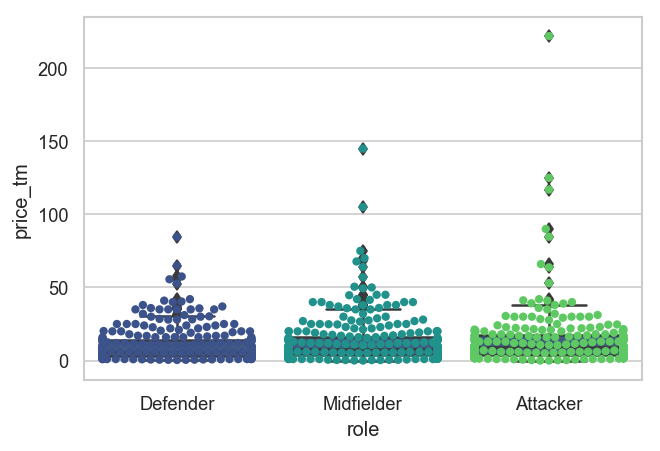

In [131]:
ax = sb.boxplot(x="role", y="price_tm", data=df, color='#365A8C')
ax = sb.swarmplot(x="role", y="price_tm", data=df,palette='viridis')

In [132]:
#dfGK = df[df.role =='Goalkeeper']
#ax = sb.boxenplot(x="season", y="price", data=dfGK, palette='viridis')
##ax = sb.swarmplot(x="season", y="price", data=dfGK)

In [72]:
# pago di più chi va bene in europa come squadra? no, o almeno non sembra
#sb.set_style('whitegrid')
#ax = sb.scatterplot(x="europeanPerf_team_from", y="price", hue="dummyfirst20", data=df, palette='viridis')

[Text(31,0.5,'Price'), Text(0.5,31,'Buyer country')]

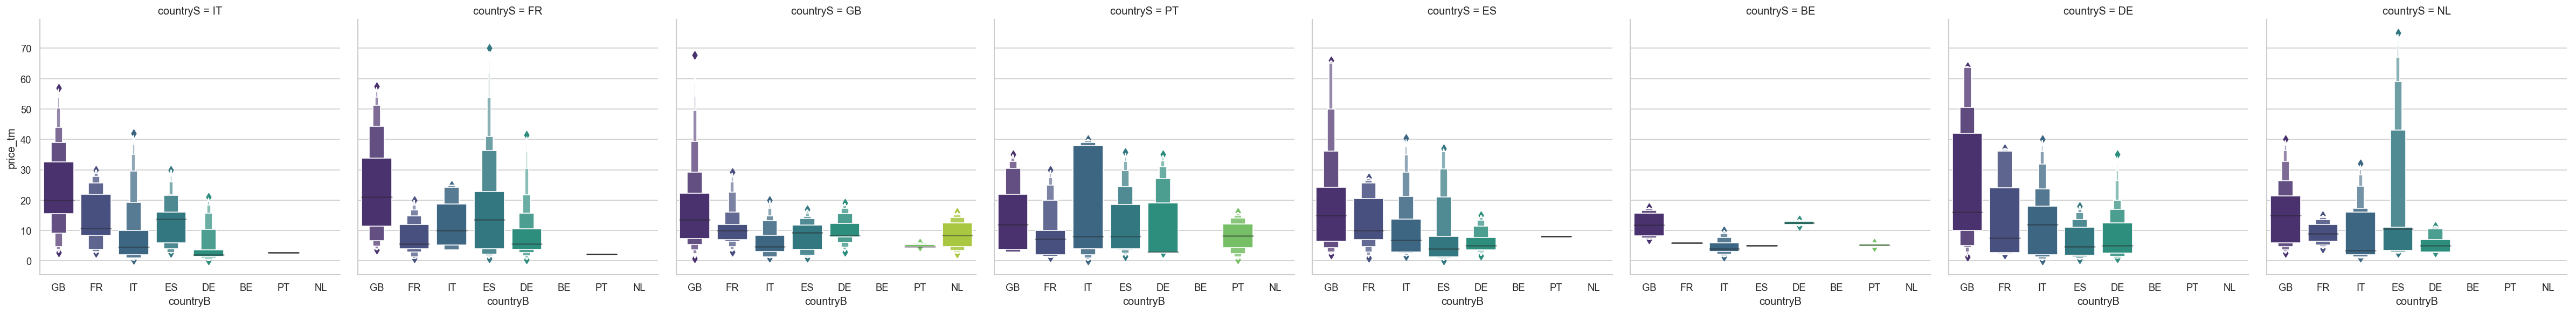

In [133]:
sb.set(rc={'figure.figsize':(10,20)})
sb.set_style('whitegrid')
g = sb.catplot(x="countryB", y="price_tm", col="countryS", data=data_pricemax80, kind="boxen",palette='viridis',order= ['GB','FR','IT','ES','DE','BE','PT','NL'])
ax.set(xlabel='Buyer country', ylabel='Price')

[Text(46.0068,0.5,'Price'), Text(0.5,40.6,'Buyer country')]

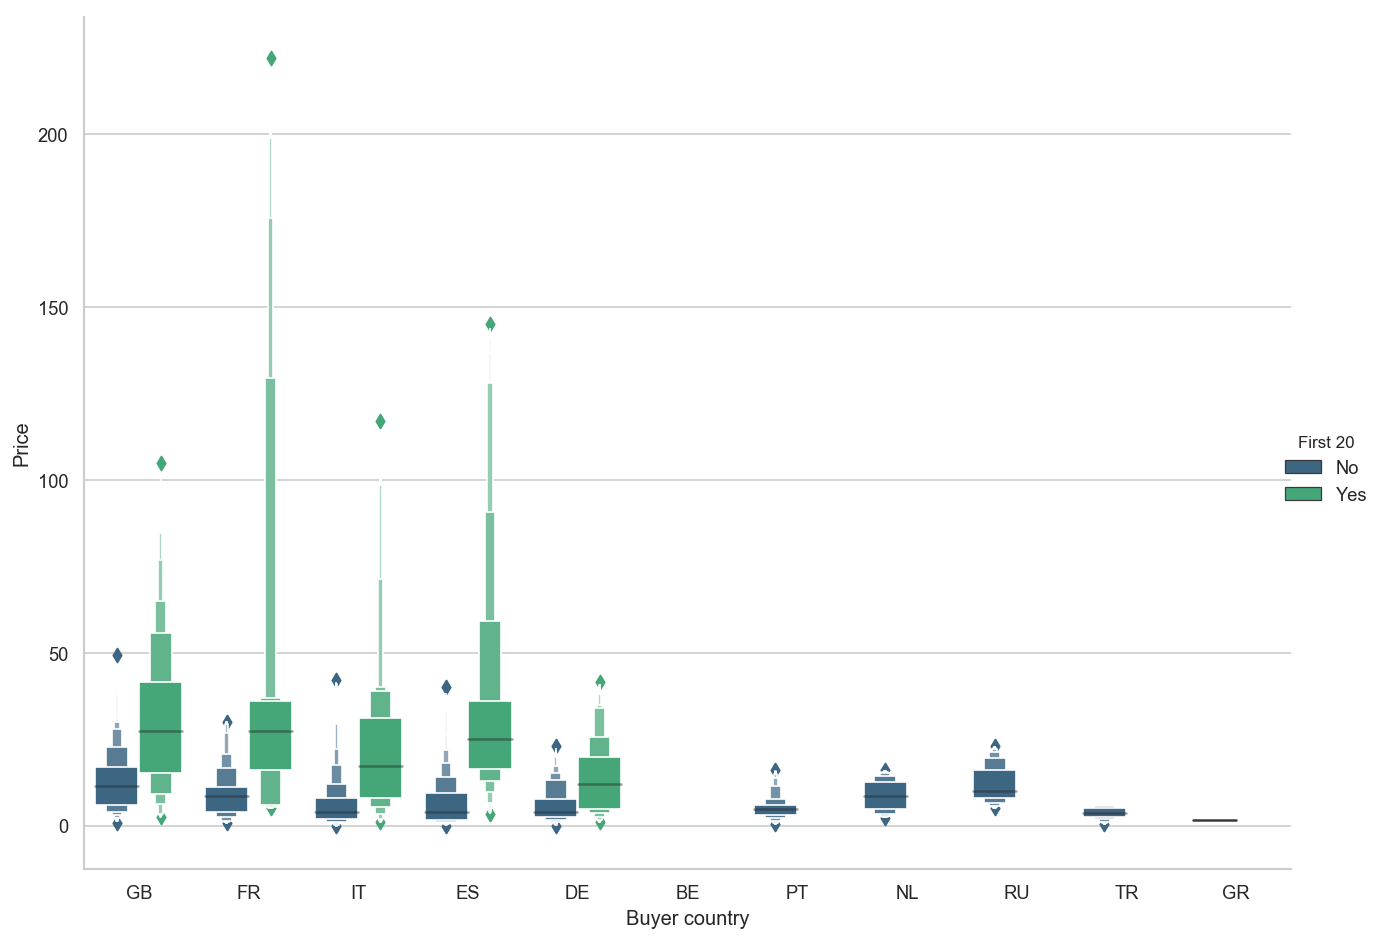

In [135]:

sb.set_style('whitegrid')
g = sb.catplot(x="countryB", y="price_tm",hue="d20",data=df, kind="boxen", palette='viridis',order= ['GB','FR','IT','ES','DE','BE','PT','NL','RU','TR','GR'],height=8, aspect=11/8)

for ax in g.axes.flat:
    leg = g.axes.flat[0].get_legend()
    if not leg is None: break
        
if leg is None: leg = g._legend
    # change legend texts
new_title = 'First 20'
leg.set_title(new_title)
new_labels = ['No', 'Yes']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

ax.set(xlabel='Buyer country', ylabel='Price')

[Text(0,0.5,'Price'), Text(0.5,0,'Buyer country')]

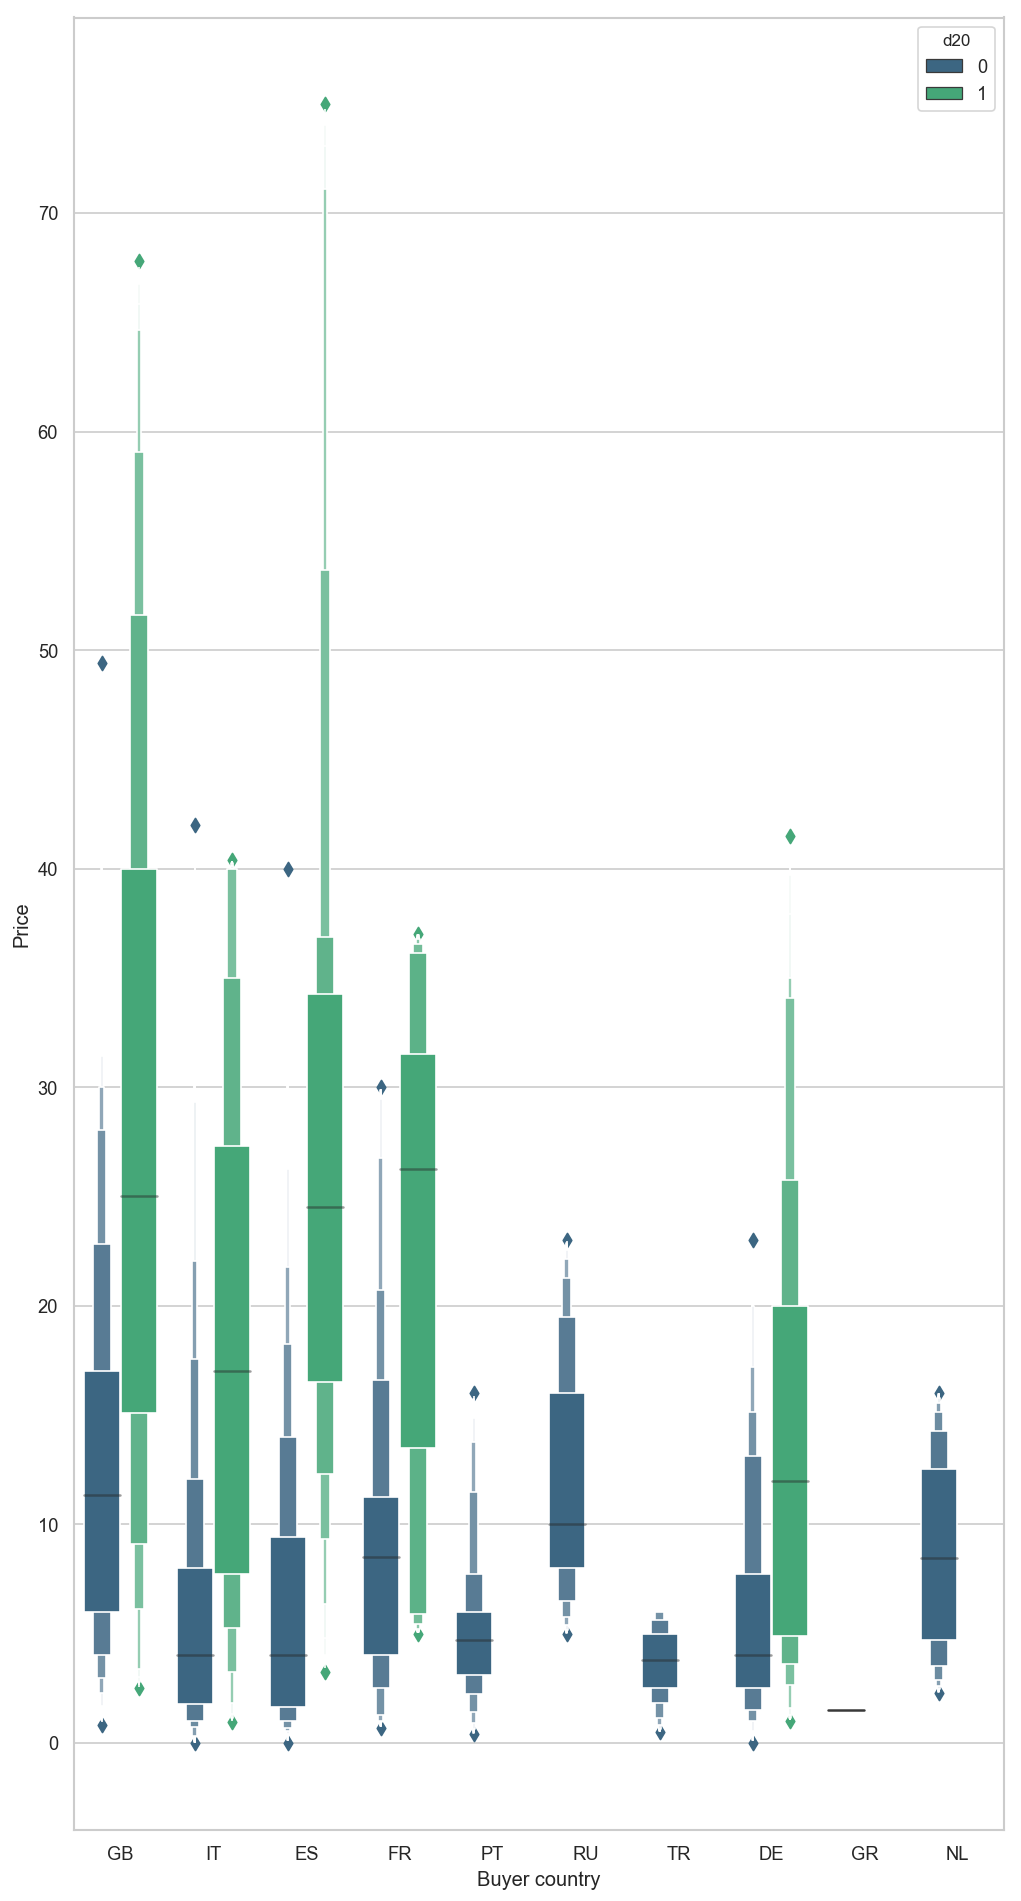

In [136]:
# se chi compra guadagna tanto allora paga di più
sb.set_style('whitegrid')
ax = sb.boxenplot(x="countryB", y="price_tm",hue="d20", data=data_pricemax80, palette='viridis')
# change legend texts
new_title = 'First 20 as revenues'
leg.set_title(new_title)
new_labels = ['No', 'Yes']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
ax.set(xlabel='Buyer country', ylabel='Price')

# TV rights

In [51]:
dtv = pd.read_excel('tv_rights_premier.xlsx', encoding='utf8')

In [52]:
dtv['years'] = dtv.index

Text(0,0.5,'TV rights (million of £)')

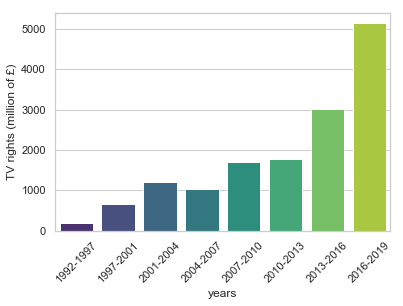

In [53]:
sb.set(style="whitegrid")
x = sb.barplot(x = 'years', y= 'tvrights', data=dtv, palette='viridis')
x.set_xticklabels(x.get_xticklabels(), rotation=45)
plt.ylabel('TV rights (million of £)')